In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('datasets/orthopedic_2C.csv')

In [34]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_53169/3407397529.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels)


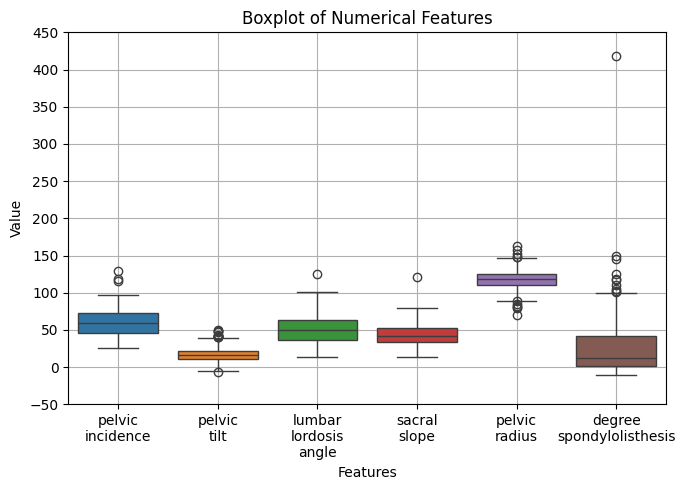

In [35]:
display(df.describe())

plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")

plt.xlabel("Features")
original_labels = df.columns[:6]
wrapped_labels = [label.replace('_', '\n') for label in original_labels]
ax.set_xticklabels(wrapped_labels)

plt.ylabel("Value")
plt.yticks(range(-50, 451, 50))

plt.grid(True)
plt.tight_layout()
plt.show()

# Label Encoding

In [36]:
encoder = OneHotEncoder(sparse_output=False)

In [37]:
encoded_array = encoder.fit_transform(df[['class']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['class']))

df = pd.concat([df, encoded_df], axis=1)

df.drop(['class','class_Normal'], axis=1, inplace=True)

# Value Counts:
display(df['class_Abnormal'].value_counts().sort_index(ascending=False))

display(df.head())

class_Abnormal
1.0    210
0.0    100
Name: count, dtype: int64

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1.0


# Feature Scaling

In [38]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()

In [39]:
feature_col_names = df.columns[:6]
feature_cols= df.iloc[:, :-1]

std_scaled_data = std_scaler.fit_transform(feature_cols)
std_scaled_df = pd.DataFrame(std_scaled_data, columns=feature_col_names)

mm_scaled_data = mm_scaler.fit_transform(feature_cols)
mm_scaled_df = pd.DataFrame(mm_scaled_data, columns=feature_col_names)

rb_scaled_data = rb_scaler.fit_transform(feature_cols)
rb_scaled_df = pd.DataFrame(rb_scaled_data, columns=feature_col_names)

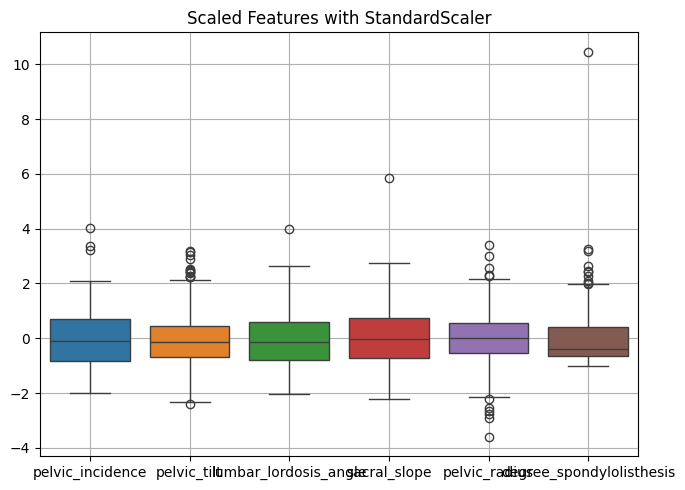

In [40]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=std_scaled_df)
plt.title("Scaled Features with StandardScaler")
plt.grid(True)
plt.tight_layout()
plt.show()

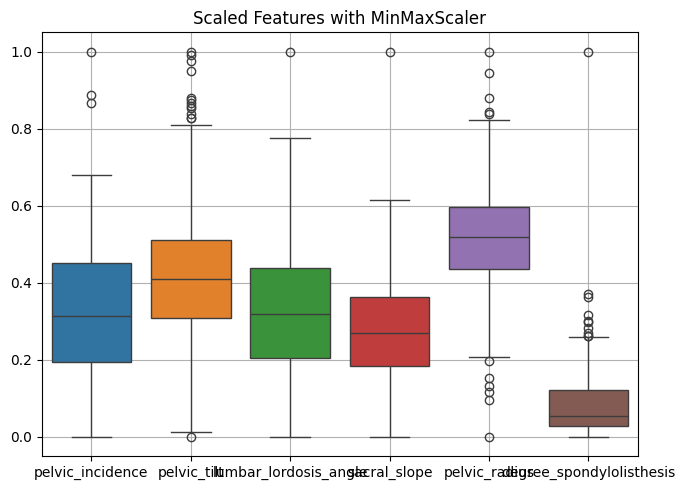

In [41]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=mm_scaled_df)
plt.title("Scaled Features with MinMaxScaler")
plt.grid(True)
plt.tight_layout()
plt.show()

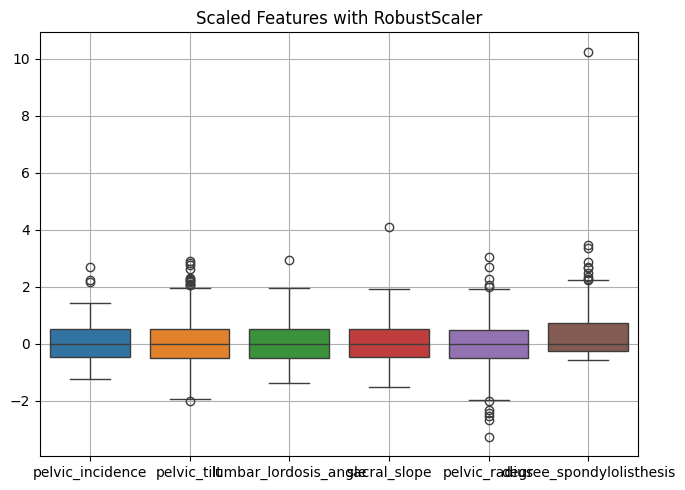

In [42]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=rb_scaled_df)
plt.title("Scaled Features with RobustScaler")
plt.grid(True)
plt.tight_layout()
plt.show()

# ML

In [43]:
y = df['class_Abnormal']

In [44]:
X = df.iloc[:, :6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7580645161290323


In [45]:
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [46]:
X = std_scaled_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7580645161290323


In [47]:
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-9.168293e-17,1.833659e-16,1.375244e-16,-1.031433e-16,4.354939e-16,1.833659e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [48]:
X = rb_scaled_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7580645161290323


In [49]:
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,3.100000e+02,310.000000,310.000000,3.100000e+02
mean,0.068272,0.103475,9.109736e-02,0.028370,-0.023547,3.661148e-01
std,0.651728,0.873836,7.136178e-01,0.693745,0.902354,9.464616e-01
min,-1.230484,-2.000523,-1.367785e+00,-1.500767,-3.264944,-5.752023e-01
25%,-0.463590,-0.496853,-4.831692e-01,-0.468133,-0.512179,-2.561310e-01
50%,0.000000,0.000000,1.370432e-16,0.000000,0.000000,2.255141e-17
75%,0.536410,0.503147,5.168308e-01,0.531867,0.487821,7.438690e-01
max,2.689981,2.887735,2.930000e+00,4.084222,3.035737,1.025045e+01
